In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

### 데이터 그룹연산 - Group By 

- Groupby는 통계자료에서 굉장히 많이 사용
- 그룹핑 시켜서 데이터의 합을 구하거나 평균치를 구하는 등에 사용함

In [2]:
np.random.seed(100)
df1 = DataFrame({
    'Gender':['Female','Male','Female','Male','Female','Male','Female','Female'],
    'Smoking':['Smoker','Smoker','Smoker','Non-Smoker','Non-Smoker','Non-Smoker','Non-Smoker','Smoker'],
    'CountA':np.random.randint(1,10,8),
    'CountB':np.random.randint(1,10,8)
})

df1

,Gender,Smoking,CountA,CountB
0,Female,Smoker,9,6
1,Male,Smoker,9,3
2,Female,Smoker,4,3
3,Male,Non-Smoker,8,3
4,Female,Non-Smoker,8,2
5,Male,Non-Smoker,1,1
6,Female,Non-Smoker,5,9
7,Female,Smoker,3,5


In [3]:
#GroupBy함수로 Grouping하면 returned DataFrameGroupBy -> 아무것도 못함
df1.groupby('Gender')

In [5]:
#groupby함수로 grouping하면 반드시 통계함수 적용해야함.
#Smoking은 Numeric Columns가 아니라 Sum()이 적용되지 않음.
df1.groupby('Gender').sum()

#max는 Numeric Columns이 아니여도 적용됨
df1.groupby('Gender').max()

,Smoking,CountA,CountB
Gender,,,
Female,Smoker,9,9
Male,Smoker,9,3


In [6]:
# 2개 이상 컬럼을 그룹핑 가능
df1.groupby(['Gender','Smoking']).sum()

CountA  CountB
Gender Smoking                   
Female Non-Smoker      13      11
       Smoker          16      14
Male   Non-Smoker       9       4
       Smoker           9       3

In [17]:
df1.groupby(['Gender'])['CountA'].sum() #Serise 반환
df1.groupby(['Gender'])[['CountA']].sum() #2차원으로 늘려서 DataFrame으로 반환

df1.groupby(['Gender'])['CountA'].agg(['sum','mean','max','min']) #집합

,sum,mean,max,min
Gender,,,,
Female,29,5.8,9,3
Male,18,6.0,9,1


In [18]:
#agg는 aggregation이라는 뜻으로 여러개의 함수를 동시에 사용해서 grouping할 수 있다.
df1. groupby('Gender')['CountA'].agg(['sum','mean','count'])

,sum,mean,count
Gender,,,
Female,29,5.8,5
Male,18,6.0,3


### 실전데이터 응용하기

In [19]:
tipdf = pd.read_csv('../data/tips.csv')
tipdf.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0


In [23]:
#날짜별로 Gropuing하고 Count()적용
tipdf.groupby('day').count() #해당 결과는 의미를 갖는 데이터가 아님

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76
Thur,62,62,62,62,62,62


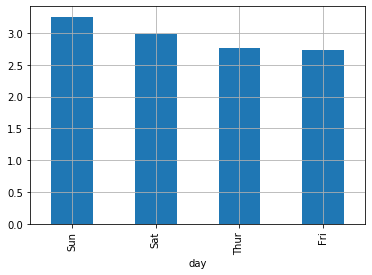

In [31]:
#day라는 컬럼을 기준으로 Grouping하고, 요일별 Tip의 평균
tipdf.groupby('day')[['tip']].mean()
tipdf.groupby('day')['tip'].agg(['mean'])

#2.
tip_group = tipdf.groupby('day')
tip_group['tip'].mean()

#3.
tip_group['tip'].mean().sort_values(ascending=False)

#4.
tip_group['tip'].mean().sort_values(ascending=False).plot(kind="bar",grid=True)
plt.show()